# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}&units=metric' 
    
             
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_response = requests.get(city_url)
        city_weather = city_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =city_weather['main']['temp_max'] 
        city_humidity = city_weather['main']['humidity'] 
        city_clouds = city_weather['clouds']['all'] 
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kurumkan
Processing Record 2 of Set 1 | vorgashor
Processing Record 3 of Set 1 | greymouth
Processing Record 4 of Set 1 | laojunmiao
Processing Record 5 of Set 1 | hawaiian paradise park
Processing Record 6 of Set 1 | olonkinbyen
Processing Record 7 of Set 1 | bredy
Processing Record 8 of Set 1 | kristiansund
Processing Record 9 of Set 1 | badger
Processing Record 10 of Set 1 | dabakala
Processing Record 11 of Set 1 | qarazhal
Processing Record 12 of Set 1 | weno
Processing Record 13 of Set 1 | porto novo
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | pacasmayo
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | tabou
Processing Record 18 of Set 1 | alofi
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | st. john's
Processing Record 21 of Set 1 | faya-largeau
Processing Record 22 of Set 1 | port elizabeth
Processing Rec

Processing Record 40 of Set 4 | isle of lewis
City not found. Skipping...
Processing Record 41 of Set 4 | yallahs
Processing Record 42 of Set 4 | usinsk
Processing Record 43 of Set 4 | angaur state
Processing Record 44 of Set 4 | labrador city
Processing Record 45 of Set 4 | gadzhiyevo
Processing Record 46 of Set 4 | howard springs
Processing Record 47 of Set 4 | kaohsiung
Processing Record 48 of Set 4 | nova sintra
Processing Record 49 of Set 4 | lompoc
Processing Record 0 of Set 5 | foso
Processing Record 1 of Set 5 | kharan
Processing Record 2 of Set 5 | kodinsk
Processing Record 3 of Set 5 | tantou
Processing Record 4 of Set 5 | susuman
Processing Record 5 of Set 5 | kamojimacho-jogejima
Processing Record 6 of Set 5 | tsiroanomandidy
Processing Record 7 of Set 5 | youhao
Processing Record 8 of Set 5 | chuguyevka
Processing Record 9 of Set 5 | leer
Processing Record 10 of Set 5 | geraldton
Processing Record 11 of Set 5 | kingston
Processing Record 12 of Set 5 | kasempa
Processing Re

Processing Record 27 of Set 8 | san andres
Processing Record 28 of Set 8 | alamosa
Processing Record 29 of Set 8 | port nelson
Processing Record 30 of Set 8 | katabu
Processing Record 31 of Set 8 | posto fiscal rolim de moura
Processing Record 32 of Set 8 | bereeda
Processing Record 33 of Set 8 | moses lake
Processing Record 34 of Set 8 | askale
Processing Record 35 of Set 8 | roma
Processing Record 36 of Set 8 | kone
Processing Record 37 of Set 8 | mhamid
Processing Record 38 of Set 8 | qaisumah
Processing Record 39 of Set 8 | vanimo
Processing Record 40 of Set 8 | pradopolis
Processing Record 41 of Set 8 | ryotsu-minato
Processing Record 42 of Set 8 | nelson bay
Processing Record 43 of Set 8 | heunghae
Processing Record 44 of Set 8 | baise city
Processing Record 45 of Set 8 | vilyuysk
Processing Record 46 of Set 8 | madera
Processing Record 47 of Set 8 | misratah
Processing Record 48 of Set 8 | statesboro
Processing Record 49 of Set 8 | choszczno
Processing Record 0 of Set 9 | berezo

Processing Record 17 of Set 12 | villa gesell
Processing Record 18 of Set 12 | weihai
Processing Record 19 of Set 12 | selebi-phikwe
Processing Record 20 of Set 12 | kiboga
Processing Record 21 of Set 12 | gribanovskiy
Processing Record 22 of Set 12 | puerto leguizamo
Processing Record 23 of Set 12 | samamea
City not found. Skipping...
Processing Record 24 of Set 12 | badou
Processing Record 25 of Set 12 | maridi
Processing Record 26 of Set 12 | collie
Processing Record 27 of Set 12 | cozumel
Processing Record 28 of Set 12 | abraham's bay
City not found. Skipping...
Processing Record 29 of Set 12 | peterhead
Processing Record 30 of Set 12 | dombarovskiy
Processing Record 31 of Set 12 | luderitz
Processing Record 32 of Set 12 | khagaria
Processing Record 33 of Set 12 | mukah
City not found. Skipping...
Processing Record 34 of Set 12 | antalaha
Processing Record 35 of Set 12 | 'ohonua
City not found. Skipping...
Processing Record 36 of Set 12 | chashniki
Processing Record 37 of Set 12 | 

In [4]:
city_data

[{'City': 'kurumkan',
  'Lat': 54.3,
  'Lng': 110.3,
  'Max Temp': 14.4,
  'Humidity': 66,
  'Cloudiness': 0,
  'Wind Speed': 0.59,
  'Country': 'RU',
  'Date': 1693432208},
 {'City': 'vorgashor',
  'Lat': 67.5833,
  'Lng': 63.95,
  'Max Temp': 6.89,
  'Humidity': 80,
  'Cloudiness': 44,
  'Wind Speed': 2.21,
  'Country': 'RU',
  'Date': 1693432209},
 {'City': 'greymouth',
  'Lat': -42.4667,
  'Lng': 171.2,
  'Max Temp': 8.58,
  'Humidity': 89,
  'Cloudiness': 93,
  'Wind Speed': 1.32,
  'Country': 'NZ',
  'Date': 1693432210},
 {'City': 'laojunmiao',
  'Lat': 39.8333,
  'Lng': 97.7333,
  'Max Temp': 17.58,
  'Humidity': 49,
  'Cloudiness': 94,
  'Wind Speed': 2.63,
  'Country': 'CN',
  'Date': 1693432211},
 {'City': 'hawaiian paradise park',
  'Lat': 19.5933,
  'Lng': -154.9731,
  'Max Temp': 27.24,
  'Humidity': 87,
  'Cloudiness': 100,
  'Wind Speed': 2.57,
  'Country': 'US',
  'Date': 1693432212},
 {'City': 'olonkinbyen',
  'Lat': 70.9221,
  'Lng': -8.7187,
  'Max Temp': 5.27,
  'Hu

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)  # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kurumkan,54.3000,110.3000,14.40,66,0,0.59,RU,1693432208
1,vorgashor,67.5833,63.9500,6.89,80,44,2.21,RU,1693432209
2,greymouth,-42.4667,171.2000,8.58,89,93,1.32,NZ,1693432210
3,laojunmiao,39.8333,97.7333,17.58,49,94,2.63,CN,1693432211
4,hawaiian paradise park,19.5933,-154.9731,27.24,87,100,2.57,US,1693432212


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kurumkan,54.3000,110.3000,14.40,66,0,0.59,RU,1693432208
1,vorgashor,67.5833,63.9500,6.89,80,44,2.21,RU,1693432209
2,greymouth,-42.4667,171.2000,8.58,89,93,1.32,NZ,1693432210
3,laojunmiao,39.8333,97.7333,17.58,49,94,2.63,CN,1693432211
4,hawaiian paradise park,19.5933,-154.9731,27.24,87,100,2.57,US,1693432212


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

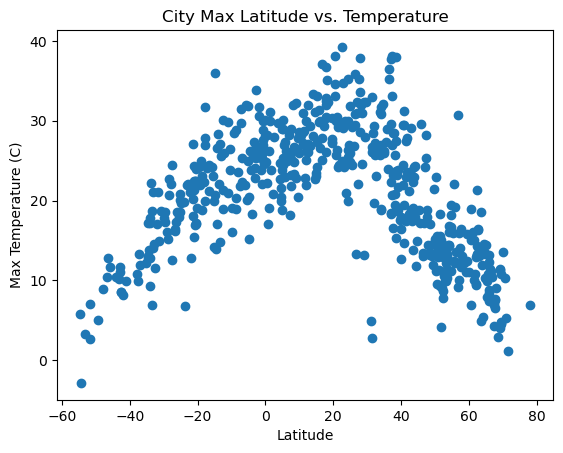

<Figure size 640x480 with 0 Axes>

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

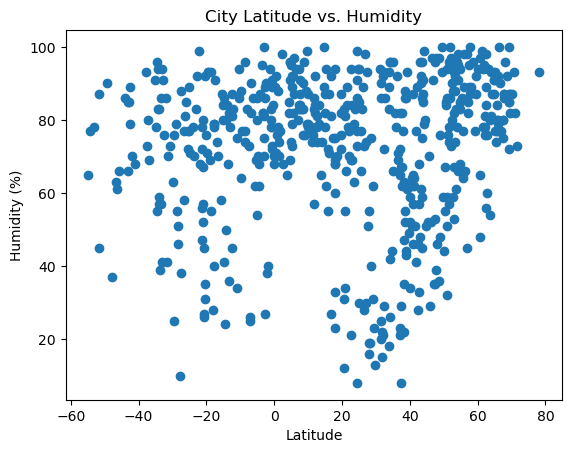

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values_2 = city_data_df['Lat']
y_values_2 = city_data_df['Humidity']
plt.scatter(x_values_2,y_values_2)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

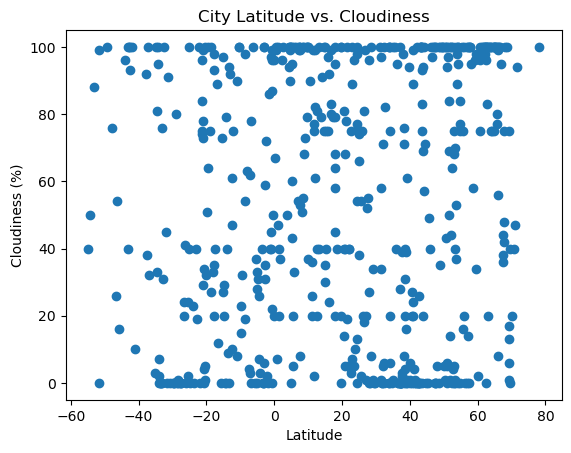

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values_3 = city_data_df['Lat']
y_values_3 = city_data_df['Cloudiness']
plt.scatter(x_values_3,y_values_3)
# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

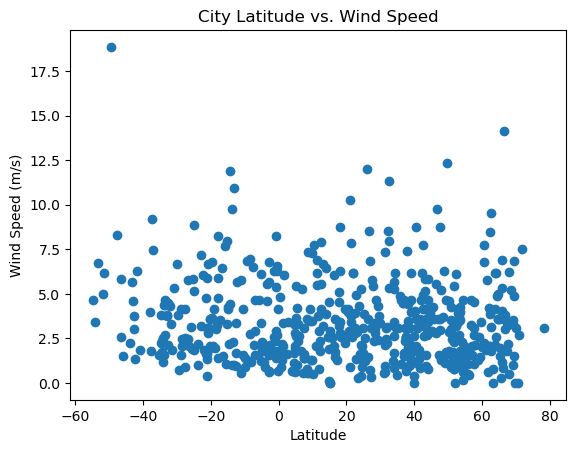

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values_4 = city_data_df['Lat']
y_values_4 = city_data_df['Wind Speed']
plt.scatter(x_values_4,y_values_4)
# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values,x_label,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5,-10),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f'The r-value is: {rvalue**2}')
    plt.show()


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df[city_data_df['Lat']  >= 0 ]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kurumkan,54.3000,110.3000,14.40,66,0,0.59,RU,1693432208
1,vorgashor,67.5833,63.9500,6.89,80,44,2.21,RU,1693432209
3,laojunmiao,39.8333,97.7333,17.58,49,94,2.63,CN,1693432211
4,hawaiian paradise park,19.5933,-154.9731,27.24,87,100,2.57,US,1693432212
5,olonkinbyen,70.9221,-8.7187,5.27,82,47,2.68,SJ,1693432213


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =city_data_df[city_data_df['Lat']< 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,greymouth,-42.4667,171.2000,8.58,89,93,1.32,NZ,1693432210
14,pacasmayo,-7.4006,-79.5714,21.87,73,4,6.52,PE,1693432224
15,puerto ayora,-0.7393,-90.3518,29.98,89,87,5.36,EC,1693432225
17,alofi,-19.0595,-169.9187,24.94,69,75,4.12,NU,1693432229
21,port elizabeth,-33.9180,25.5701,17.16,59,0,1.54,ZA,1693432235


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5345692691864019


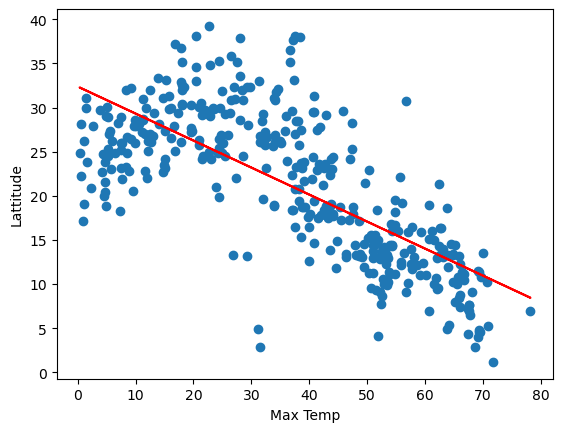

In [27]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
x_label = 'Max Temp'
y_label = 'Lattitude'
plot_linear_regression (x_values,y_values,x_label,y_label)

The r-value is: 0.6538931789025485


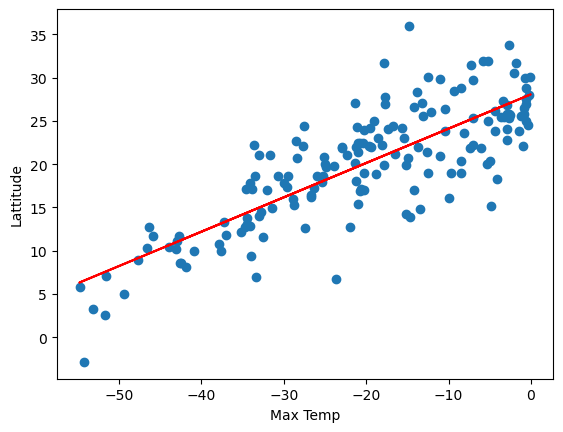

In [28]:
# Linear regression on Southern Hemisphere
x_values =southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
x_label = 'Max Temp'
y_label = 'Lattitude'
plot_linear_regression (x_values,y_values,x_label,y_label)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.006353163755419908


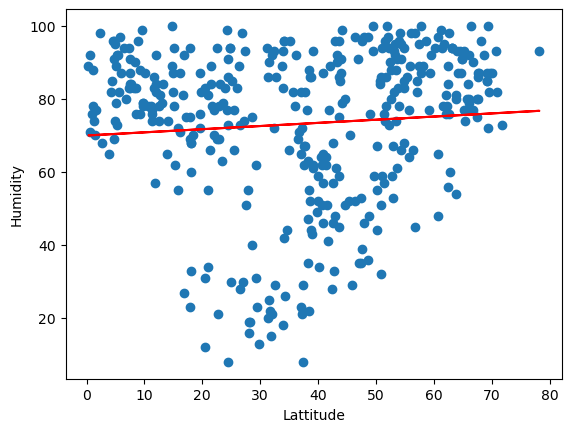

In [29]:
# Northern Hemisphere
x_values =northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
x_label = 'Lattitude'
y_label = 'Humidity'
plot_linear_regression (x_values,y_values,x_label,y_label)

The r-value is: 0.0037064810013883705


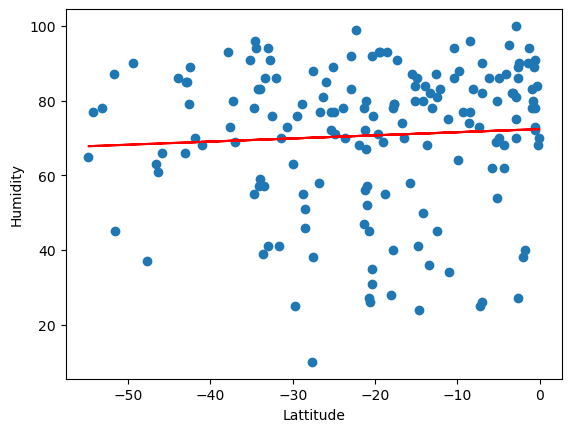

In [30]:
# Southern Hemisphere
x_values =southern_hemi_df['Lat']
y_values =southern_hemi_df['Humidity']
x_label = 'Lattitude'
y_label = 'Humidity'
plot_linear_regression (x_values,y_values,x_label,y_label)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 9.980313558563036e-05


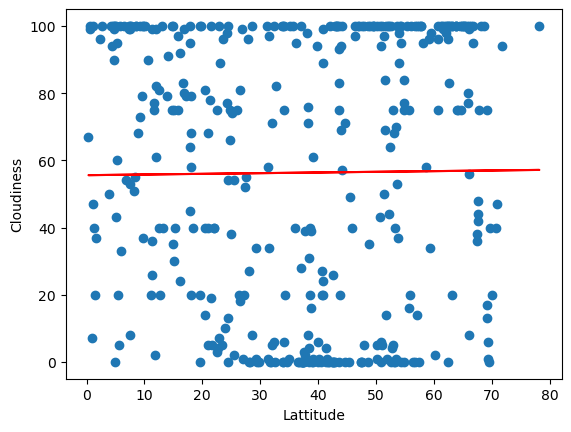

In [34]:
# Northern Hemisphere
x_values =northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
x_label = 'Lattitude'
y_label = 'Cloudiness'
plot_linear_regression (x_values,y_values,x_label,y_label)

The r-value is: 0.0055786785076500835


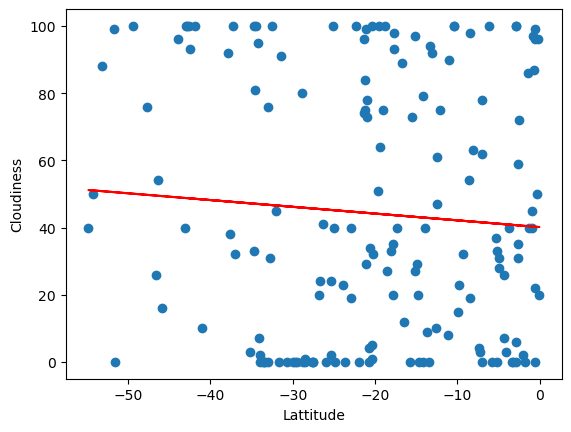

In [32]:
# Southern Hemisphere
x_values =southern_hemi_df['Lat']
y_values =southern_hemi_df['Cloudiness']
x_label = 'Lattitude'
y_label = 'Cloudiness'
plot_linear_regression (x_values,y_values,x_label,y_label)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0006078670195347426


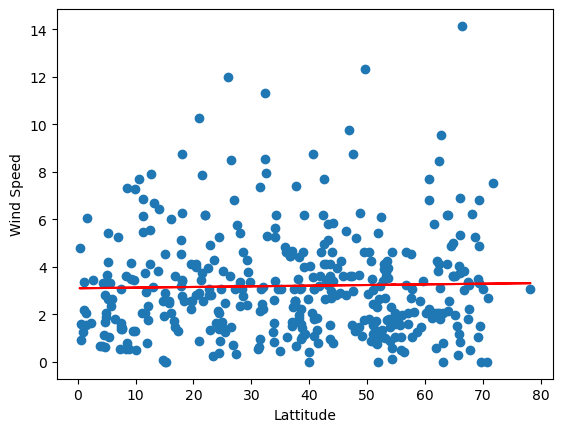

In [35]:
# Northern Hemisphere
x_values =northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
x_label = 'Lattitude'
y_label = 'Wind Speed'
plot_linear_regression (x_values,y_values,x_label,y_label)

The r-value is: 0.02617495552853597


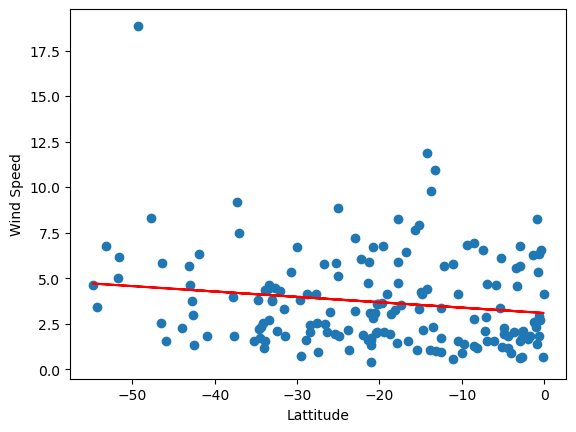

In [36]:
# Southern Hemisphere
x_values =southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
x_label = 'Lattitude'
y_label = 'Wind Speed'
plot_linear_regression (x_values,y_values,x_label,y_label)